
# ADA final exam

## Deadline
_Friday, January 19, 2018, at 19:15 CET_


## Important notes

* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will monitor the network for unusual activities.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Make sure you upload your iPython Notebook (1 file) with [this form](https://goo.gl/forms/JKPX74ZH707sB7Up1) at the end of the exam, with all the cells already evaluated (except for the Spark-related question 1.4).
* Complete all the fields in the form, and name your file following the format "NameSurname_sciper.ipynb". The form will be open to submissions until 19:20 (strict deadline). Late submissions will not be accepted.

# Design the Pokedex 2.0

![banner](images/dataset-cover.jpg)

Pokémon are small creatures that fight in competitions. All Pokémon have different numerical characteristics (strength of attack, defense, etc.) and belong to one or two so-called classes (water, fire, etc.).
[Professor Oak](https://www.pojo.com/cartoon/Oak.gif) is the inventor of the [Pokedex](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Pok%C3%A9dex), a useful portable device that keeps information about all the Pokémon available. As his lead data scientist, you just received a request from him asking you to update the software on all Pokedex devices. In this exam, you will work toward improving the Pokedex by (1) exploring a dataset of Pokémon and the battles they fight, (2) developing a model for predicting the outcome of battles between Pokémon, and (3) devising a method for ranking Pokémon by their overall strength.

## Dataset description
Professor Oak has dumped the memory of one Pokedex device, resulting in the dataset you’ll work with in this exam.

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner

## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.
2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.
3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.
4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.
2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?
3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.
4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?
5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).
6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.
7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.


### Good luck!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import csv
from scipy.stats import pearsonr, chisquare
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
import random
from sklearn.metrics import f1_score
%matplotlib inline


C:\Users\jurgi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pokemon = pd.read_csv('pokemon.csv')
combat = pd.read_csv('combats.csv')

In [3]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:

pokemon.head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


In [5]:
pokemon[['Class 1', 'Name']].groupby('Class 1').count()

,Name
Class 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,26
Fire,52
Flying,4
Ghost,32


In [6]:
print('Combat shape: ', combat.shape, '  and pokemon shape: ', pokemon.shape)

Combat shape:  (50000, 3)   and pokemon shape:  (800, 11)


In [7]:
print('Class 1 describe: \n',pokemon['Class 1'].describe(), '\n\nClass 2 describe: \n',pokemon['Class 2'].describe())

Class 1 describe: 
 count       800
unique       18
top       Water
freq        112
Name: Class 1, dtype: object 

Class 2 describe: 
 count        414
unique        18
top       Flying
freq          97
Name: Class 2, dtype: object


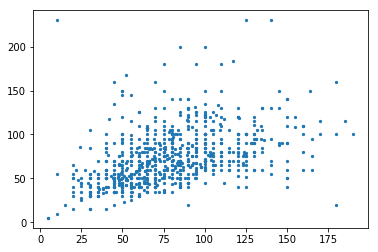

In [8]:
plt.scatter(pokemon.Attack, pokemon.Defense, s=5)
plt.show()

In [9]:
attack_defense = pokemon[['Name','Class 1','Class 2', 'Attack', 'Defense']].copy()
attack_defense['ratio'] = attack_defense.Attack/attack_defense.Defense
print('Highest attack over defense ratio: \n',attack_defense.sort_values('ratio', ascending=False).head(3), '\n')
print('Lowest attack over defense ratio: \n',attack_defense.sort_values('ratio').head(3))

Highest attack over defense ratio: 
                    Name  Class 1 Class 2  Attack  Defense  ratio
429  DeoxysAttack Forme  Psychic     NaN     180       20   9.00
347            Carvanha    Water    Dark      90       20   4.50
19        Mega Beedrill      Bug  Poison     150       40   3.75 

Lowest attack over defense ratio: 
          Name Class 1  Class 2  Attack  Defense     ratio
230   Shuckle     Bug     Rock      10      230  0.043478
139  Magikarp   Water      NaN      10       55  0.181818
484   Bronzor   Steel  Psychic      24       86  0.279070


In [10]:
winners = combat.groupby('Winner').count().sort_values('First_pokemon',ascending=False).head(10).reset_index().copy()

In [11]:
pokemon.iloc[winners.Winner]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
438,439,Piplup,Water,NaN,53,51,53,61,56,40,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
432,433,Turtwig,Grass,NaN,55,68,64,45,55,31,False
314,315,Nincada,Bug,Ground,31,45,90,30,30,40,False
214,215,Slowking,Water,Psychic,95,75,80,100,110,30,False
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,False
249,250,Kingdra,Water,Dragon,75,95,95,95,95,85,False
155,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False


In [12]:
attack_defense.head(3)

,Name,Class 1,Class 2,Attack,Defense,ratio
0,Bulbasaur,Grass,Poison,49,49,1.000000
1,Ivysaur,Grass,Poison,62,63,0.984127
2,Venusaur,Grass,Poison,82,83,0.987952


In [13]:
grass = attack_defense[attack_defense['Class 1'] == 'Grass'].copy()
rock = attack_defense[attack_defense['Class 1'] == 'Rock'].copy()
rock = rock[~(rock['Class 2'] == 'Grass')]
grass = grass[~(grass['Class 2'] == 'Rock')]

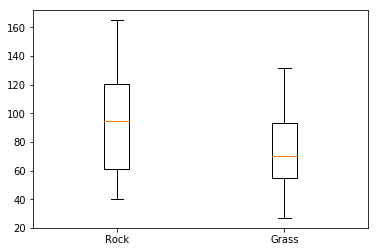

In [14]:
plt.boxplot((rock.Attack, grass.Attack), labels=('Rock', 'Grass'))
plt.show()

In [15]:
from scipy.stats import ttest_ind
ttest_ind(rock.Attack, grass.Attack)

Ttest_indResult(statistic=3.6867299152069792, pvalue=0.0003544849009013808)

From the boxplot we can make a hypotheis that these the rock type attack has significantly higher attack than the grass type pokemons. To test this hypothesis we propose a null hypothesis, that both of them have the same expected mean values. We test this null hypothesis by the independent T-test. As the p-value comes lower than the standard confidence interval, we come to the conclusion, that the null hypothesis can be rejected. But to confirm that the rock type pokemon have significantly higher attack damage than the we should do more sampling.

4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

In [152]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0


In [153]:
combat.head(1)

,First_pokemon,Second_pokemon,Winner,categorical,Loser
0,266,298,298,0,266


In [ ]:
s = '''
SELECT * FROM combat GROUP by Winner
FROM combat * JOIN pokemon * ON combat.Winner = pokemon.pid
SELECT * FROM combat ORDER by First_pokemon
'''
top_winners = spark.sql(s)

-- first alternative
winner = '''
select combat.winner as winner, count(*) as count from combat
group by winner
'''
spark.sql(winner).registerTempTabel("combat_winner")
'''
select p.name from pokemon p
join combat_winner w join w.winner on p.pid
order by w.count desc
limit 10
'''

-- one sql
'''
select p.name from pokemon p
join combats c on c.winner = p.pid
group by p.pid
order by w.count desc
limit 10

'''


In [16]:
dummy_variables = ['pid','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Class 1', 'Class 2','Legendary']

In [17]:
pokemon.Legendary = pokemon.Legendary.astype('int')

In [18]:
extended_features = pd.get_dummies(pokemon[dummy_variables], dtype='int').copy()
extended_features.head(3)

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Class 1_Bug,Class 1_Dark,...,Class 2_Ghost,Class 2_Grass,Class 2_Ground,Class 2_Ice,Class 2_Normal,Class 2_Poison,Class 2_Psychic,Class 2_Rock,Class 2_Steel,Class 2_Water
0,1,45,49,49,65,65,45,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,60,62,63,80,80,60,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,80,82,83,100,100,80,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
first_pok_combat = pd.DataFrame(combat.First_pokemon)
second_pok_combat = pd.DataFrame(combat.Second_pokemon)
first_pok_combat = first_pok_combat.rename(columns={'First_pokemon':'pid'})
second_pok_combat = second_pok_combat.rename(columns={'Second_pokemon':'pid'})

In [20]:
first_pok = pd.merge(first_pok_combat, extended_features, how='left', left_on='pid', right_on='pid')
second_pok = pd.merge(second_pok_combat, extended_features, how='left', left_on='pid', right_on='pid')

In [21]:
columns_pok = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Legendary',
       'Class 1_Bug', 'Class 1_Dark', 'Class 1_Dragon', 'Class 1_Electric',
       'Class 1_Fairy', 'Class 1_Fighting', 'Class 1_Fire', 'Class 1_Flying',
       'Class 1_Ghost', 'Class 1_Grass', 'Class 1_Ground', 'Class 1_Ice',
       'Class 1_Normal', 'Class 1_Poison', 'Class 1_Psychic', 'Class 1_Rock',
j       'Class 1_Steel', 'Class 1_Water', 'Class 2_Bug', 'Class 2_Dark',
       'Class 2_Dragon', 'Class 2_Electric', 'Class 2_Fairy',
       'Class 2_Fighting', 'Class 2_Fire', 'Class 2_Flying', 'Class 2_Ghost',
       'Class 2_Grass', 'Class 2_Ground', 'Class 2_Ice', 'Class 2_Normal',
       'Class 2_Poison', 'Class 2_Psychic', 'Class 2_Rock', 'Class 2_Steel',
       'Class 2_Water']

In [22]:
difference_fighting = first_pok[columns_pok] - second_pok[columns_pok]

In [23]:
#combat_xxx = combat[['First_pokemon','Second_pokemon']].copy()
#combat_xxx = pd.concat([combat_xxx, difference_fighting], axis=1)
combat_x = difference_fighting.copy()
combat['categorical'] = 1
combat.categorical[combat.Second_pokemon == combat.Winner] = 0
y_combat = combat['categorical'].copy()

In [24]:
def split_to_train_and_test_set(x, y, ratio, seed=1):
    # sets a seed for the split
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [25]:
x_tr, x_te, y_tr, y_te = split_to_train_and_test_set(combat_x.values, y_combat.values, 0.9)

In [26]:
def testing_forest(x_tr, y_tr, x_te, y_te):
    estim = [10,25,50,100]
    depth = [2,4,10]
    for i in estim:
        for m in depth:
            forest = RandomForestClassifier(n_estimators=i,
                                            max_depth=m).fit(x_tr, y_tr)
            y_tester = forest.predict(x_te)
            f1 = f1_score(y_te, y_tester)
            print('For {} n_estimators and {} max_depth we get an F1 score of {},'.format(i, m, f1))

In [41]:
testing_forest(x_tr, y_tr, x_te, y_te)

For 10 n_estimators and 2 max_depth we get an F1 score of 0.8135198135198135,
For 10 n_estimators and 4 max_depth we get an F1 score of 0.9358345768492858,
For 10 n_estimators and 10 max_depth we get an F1 score of 0.9436769394261425,
For 25 n_estimators and 2 max_depth we get an F1 score of 0.8246924428822495,
For 25 n_estimators and 4 max_depth we get an F1 score of 0.9396058486967577,
For 25 n_estimators and 10 max_depth we get an F1 score of 0.9416259817448525,
For 50 n_estimators and 2 max_depth we get an F1 score of 0.9394580863674853,
For 50 n_estimators and 4 max_depth we get an F1 score of 0.9390605162928481,
For 50 n_estimators and 10 max_depth we get an F1 score of 0.9422505307855626,
For 100 n_estimators and 2 max_depth we get an F1 score of 0.9394580863674853,
For 100 n_estimators and 4 max_depth we get an F1 score of 0.9402542372881356,
For 100 n_estimators and 10 max_depth we get an F1 score of 0.9414758269720102,


In [42]:
def build_k_indices(y, k_fold, seed):
    """
    Function that builds k random indices from the length of the
    dataset for the cross validation
    Returns
       - random indeces from our dataset
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, estim, depth):
    '''
    Does the k-fold (5) split on the dataset and performs cross validation
    '''
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_c = y[te_indice]
    y_tr_c = y[tr_indice]
    x_te_c = x[te_indice]
    x_tr_c = x[tr_indice]
    forest = RandomForestClassifier(n_estimators=estim,
                            max_depth=depth).fit(x_tr, y_tr)
    y_tester = forest.predict(x_te)
    f1 = f1_score(y_te, y_tester)
    return f1
    


# Performs the cross validation testing on the data   
def cross_val_test(y, x):
    seed = 1
    k_fold = 5
    k_indices = build_k_indices(y, k_fold, seed)
    f1_kfold = []
    f1_full = []
    estim = [10,25,50,100]
    depth = [2,4,10]
    for esti in estim:
        for dept in depth:  
            for i in range(k_fold):
                f1 = cross_validation(y, x, k_indices, i, esti, dept)
                f1_kfold.append(f1)
            f1_full.append(np.sum(f1_kfold)/k_fold)
            print('For {} n_estimators and {} max_depth we get an F1 score of {},'.format(esti,dept, np.sum(f1_kfold)/k_fold))
            f1_kfold = []
    return f1_full

In [43]:
f1_full = cross_val_test(y_combat.values, combat_x.values)

For 10 n_estimators and 2 max_depth we get an F1 score of 0.7876364247768042,
For 10 n_estimators and 4 max_depth we get an F1 score of 0.9156470782242385,
For 10 n_estimators and 10 max_depth we get an F1 score of 0.9427557498094886,
For 25 n_estimators and 2 max_depth we get an F1 score of 0.9145275858425211,
For 25 n_estimators and 4 max_depth we get an F1 score of 0.9395467770011534,
For 25 n_estimators and 10 max_depth we get an F1 score of 0.9422253367856974,
For 50 n_estimators and 2 max_depth we get an F1 score of 0.9285786320250644,
For 50 n_estimators and 4 max_depth we get an F1 score of 0.9348689407502576,
For 50 n_estimators and 10 max_depth we get an F1 score of 0.9423200383158197,
For 100 n_estimators and 2 max_depth we get an F1 score of 0.9006223379534068,
For 100 n_estimators and 4 max_depth we get an F1 score of 0.9392521864003234,
For 100 n_estimators and 10 max_depth we get an F1 score of 0.9420898886388395,


Feature ranking:
1. feature 5 (0.629238)
2. feature 3 (0.097205)
3. feature 1 (0.089871)
4. feature 0 (0.033458)
5. feature 4 (0.027984)
6. feature 6 (0.021434)
7. feature 32 (0.019077)
8. feature 2 (0.011617)
9. feature 33 (0.010943)
10. feature 19 (0.006197)


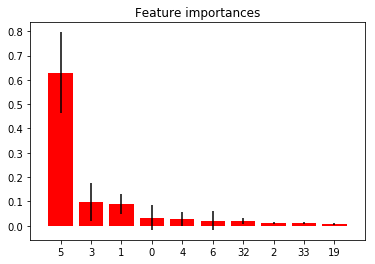

In [27]:
forest = RandomForestClassifier(n_estimators=10,max_depth=10)

forest.fit(combat_x.values, y_combat.values)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]],
       color="r", yerr=std[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [28]:
combat.head()

,First_pokemon,Second_pokemon,Winner,categorical
0,266,298,298,0
1,702,701,701,0
2,191,668,668,0
3,237,683,683,0
4,151,231,151,1


In [29]:
combat_first = combat[['First_pokemon', 'Winner']]
combat_second = combat[['Second_pokemon', 'Winner']]

In [30]:
first_combat = combat_first.groupby('First_pokemon').count()
second_combat = combat_second.groupby('Second_pokemon').count()
first_combat = first_combat.reset_index()
second_combat = second_combat.reset_index()

In [31]:
first_combat.Winner = first_combat.Winner + second_combat.Winner

In [109]:
ratio = first_combat.rename(columns={'Winner':'fights',
                                     'First_pokemon':'pid'})

In [110]:
winners = combat[['Winner','categorical']].copy()

In [111]:
winners = winners.groupby('Winner').count().reset_index()

In [112]:
winners.head()

,Winner,categorical
0,1,37
1,2,46
2,3,89
3,4,70
4,5,55


In [113]:
ratio = pd.merge(ratio, winners, left_on='pid',right_on='Winner')

In [114]:
ratio.Winner = ratio.categorical/ratio.fights

In [115]:
new_pokemon = pd.merge(pokemon, ratio,how='left', on='pid')#.sort_values('Winner', ascending=False)

In [116]:
new_pokemon.drop(['fights','categorical'], axis=1, inplace=True)

In [117]:
new_pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0,0.278195


In [118]:
new_pokemon.set_index('pid', inplace=True)

In [119]:
tester_combat = combat[['First_pokemon', 'Second_pokemon']]

In [120]:
poke_combat_inedx = first_combat.First_pokemon.values

In [121]:
mylist = [1,2,3,4,5,6]
"""for i in mylist:
    for a in mylist[]"""

'for i in mylist:\n    for a in mylist[]'

In [122]:
new_pokemon.sort_values('Winner', ascending=False).head(10)

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winner
pid,,,,,,,,,,,
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,0,0.984496
513,Weavile,Dark,Ice,70,120,65,45,85,125,0,0.974790
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,1,0.968000
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,0,0.966387
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,0,0.964539
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,0,0.961240
727,Greninja,Water,Dark,72,95,67,103,71,122,0,0.960630
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,0,0.959350
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,0.952000


In [123]:
combat['Loser'] = combat.First_pokemon + combat.Second_pokemon - combat.Winner

In [124]:
new_combat = combat[['Winner', 'Loser']].copy()
new_combat['counter'] = 0

In [125]:
trail = new_combat.groupby(['Winner','Loser']).count().reset_index()

In [126]:
shitRandom = combat[(combat.First_pokemon<10) & (combat.Second_pokemon<10)]


In [127]:
randomShit = new_combat[(new_combat.Winner<10) & (new_combat.Loser <10)].copy()

In [128]:
randomShit

,Winner,Loser,counter
13674,4,3,0
17345,5,2,0
17362,6,1,0
37033,3,4,0
44164,8,5,0


In [129]:
adjacency = pd.crosstab(randomShit.Winner, randomShit.Loser, margins=False)
adjacency2 = adjacency.transpose()
nulles = np.zeros((11,11))
df_nulles = pd.DataFrame(nulles)
df_nulles = df_nulles.drop(0)
df_nulles = df_nulles.drop(columns=0)

In [130]:
zeros = np.zeros((801,801))
df_zeros = pd.DataFrame(zeros)
df_zeros = df_zeros.drop(0)
df_zeros = df_zeros.drop(columns=0)

In [131]:
adjacency = pd.crosstab(new_combat.Loser, new_combat.Winner, margins=False)

In [132]:
adjacency = df_zeros.add(adjacency, fill_value=0)

In [133]:
npadjacency = np.asarray(adjacency)

In [134]:
adjacencyTrans = np.transpose(npadjacency)

In [135]:
equal_values = np.equal(npadjacency, adjacencyTrans)

In [136]:
equal_values[equal_values == True] = 0

In [137]:
equal_values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [138]:
npadjacency[equal_values==True]= 0

In [139]:
npadjacency[npadjacency>1]=0

In [140]:
dominance_matrix = npadjacency + np.square(npadjacency)

In [141]:
np.sum(npadjacency[155,:])

64.0

In [144]:
dominance_score = np.sum(dominance_matrix[i,:] for i in range(800))

C:\Users\jurgi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [145]:
ratio.head(1)

,pid,fights,Winner,categorical
0,1,133,0.278195,37


In [146]:
new_pokemon['dominance_score'] = dominance_score
#new_pokemon['fights'] = ratio.fights
#new_pokemon['wins'] = ratio.wins
new_pokemon = pd.merge(new_pokemon.reset_index(), ratio, on = 'pid')


In [151]:
new_pokemon.sort_values('dominance_score', ascending = False).head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winner_x,dominance_score,fights,categorical
155,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,0.926829,250.0,164,152
419,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,1,0.917241,234.0,145,133
415,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,1,0.875817,230.0,153,134
146,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,0,0.964539,230.0,141,136
238,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,0,0.948148,226.0,135,128
205,214,Murkrow,Dark,Flying,60,85,42,85,42,91,0,0.822785,224.0,158,130
156,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,0.925926,224.0,135,125
147,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,0,0.984496,222.0,129,127
382,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,0,0.935252,220.0,139,130
414,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,1,0.947761,220.0,134,127


2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.


The dominance score represents all of the 1-step and 2-step dominances of a pokemon, that is, if a pokemon i is dominating over pokemon j and if j is dominating against k, then pokemon i is also dominating over k. This is what the G^2 matrix shows. Thus, by summing over the G and G^2 we get a larger degree of dominance score. And by summing all row elements we get the power rank of a pokemon, which shows how many 1-step and 2-step dominances one has. 

When sorting by dominance score or by winning ratio there are noticable differences in the top10. This is because the dominance score rewards more those pokemons which have a higher amount of fights, while the ratio rewards those with higher number of pure wins. The dominance score values the total fights more, because it calculates against how many other pokemon one is dominating, thus, if it has had purely more fights, it can have a higher dominance score. This could be potentially fixed if we could have a bigger dataset, where all the pokemon would have fought each other at least once, thus giving rise to a complete dominance score.